<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя лабораторная работа №3 по вычислительной математике

Державин Андрей, Б01-909 группа

## Задача __IV.12.7(г)__
$$
\left\lbrace
\begin{matrix}
\cos{y} - x = -0.85 \\
\sin{x} - y = 1.32 \\
\end{matrix}
\right., \: \: \varepsilon = 10^{-5}
$$

In [47]:
import numpy as np 
from matplotlib import pyplot as plt

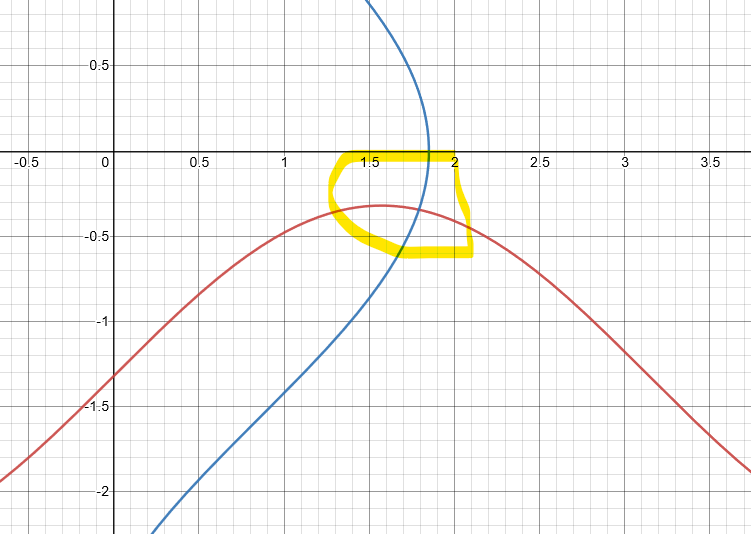

По графику видно, что решение находится в области
$$
G : 
\left\lbrace
\begin{matrix}
x \in \left[1.5, 2 \right]\\
y \in \left[-0.5, 0 \right]
\end{matrix}
\right\rbrace
$$
Выберем начальную точку для МПИ как середину:
$$
\vec{x}_0 = (1.8, -0.3)
$$
Сузим область:
$$
G : 
\left\lbrace
\begin{matrix}
x \in \left[1.7, 1.9 \right]\\
y \in \left[-0.4, -0.2 \right]
\end{matrix}
\right\rbrace
$$


Приведём систему к виду $\vec{x}_{n+1} = \vec{\varphi}\left(\vec{x}_{n} \right)$:
$$
\left\lbrace
\begin{matrix}
x = 0.85 + \cos{y}\\
y = -1.32 + \sin{x}\\
\end{matrix}
\right. \Leftrightarrow
\left\lbrace
\begin{matrix}
\varphi_1 = x_{n+1} = 0.85 + \cos{y_n}\\
\varphi_2 = y_{n+1} = -1.32 + \sin{x_n}\\
\end{matrix}
\right.
$$
Вычислим матрицу:
$$
M = \left( 
\begin{matrix}
\frac{\partial \varphi_1}{\partial x} & \frac{\partial \varphi_1}{\partial y} \\
\frac{\partial \varphi_2}{\partial x} & \frac{\partial \varphi_2}{\partial y} \\
\end{matrix}
\right)
$$

$$
\frac{\partial \varphi_1}{\partial x} = 0, \: 
\frac{\partial \varphi_1}{\partial y} = -\sin{y_n}
$$
$$
\left|\frac{\partial \varphi_1}{\partial y}\right| \leqslant
\sin{0.4} < 0.4
$$
$$
\frac{\partial \varphi_2}{\partial x} = \cos{x_n}, \: 
\frac{\partial \varphi_2}{\partial y} = 0
$$
$$
\left|\frac{\partial \varphi_2}{\partial x} \right| \leqslant
\left|\cos{1.9}\right| < 0.33
$$
Таким образом, $\left|\left| M \right|\right|_2 < 1 \Rightarrow$ метод простых итераций сходится

In [ ]:
epsilon = 1e-5
x, y = 1.8, -0.3
xprev, yprev = 0, 0
iters = 0

while 1:
  iters += 1
  xprev, yprev = x, y
  x, y = 0.85 + np.cos(y), -1.32 + np.sin(x)

  if max(abs(x - xprev), abs(y - yprev)) < epsilon:
    break

print(f'(x, y) = ({x}, {y})')
print(f'iters = {iters}')

(x, y) = (1.7913388724813675, -0.34421976363320883)
iters = 8


## Метод Ньютона

Функции для подсчета норм матрицы

In [ ]:
def norm_1(matr):
  max_s = 0
  rows, cols = matr.shape
  for j in range(cols):
    sum = 0
    for i in range(rows):
      sum += abs(matr[i][j])
    max_s = max(sum, max_s)

  return max_s

def norm_2(matr):
  rows, cols = matr.shape
  max_s = 0
  for i in range(rows):
    max_s = max(sum(abs(matr[i])), max_s)

  return max_s

def norm_3(matr):
  return np.sqrt(max(abs(np.linalg.eigvals(np.dot(matr, matr.transpose())))))

def vec_n1(vec):
  return max(abs(vec))

def vec_n2(vec):
  return sum(abs(vec))

def vec_n3(vec):
  return np.sqrt(sum(vec * vec))

$$
\vec{x}_{n+1} = \vec{x}_n - J^{-1}(\vec{x}_n) \cdot \vec{f}(\vec{x}_n)
$$
Где 
$$
\left\lbrace
\begin{matrix}
f_1 = \cos{y} - x + 0.85\\
f_2 = -y  -1.32 + \sin{x}\\
\end{matrix}
\right.
$$
Будем решать СЛАУ для приращения:
$$
  J(⃗\vec{x}_n) \cdot \overrightarrow{\Delta x} = - \vec{f}(\vec{x}_n)
$$
$$
J= \left(
\begin{matrix}
-1 & -\sin{y} \\
 \cos{x} & -1 \\
\end{matrix}
\right)
$$

In [ ]:
def get_LUD(matr):
  sz = matr.shape[0]
  D = np.zeros((sz, sz))
  L = np.zeros((sz, sz))
  U = np.zeros((sz, sz))
  for i in range(sz):
    for j in range(sz):
      if i == j:
        D[i][j] = matr[i][j]
      elif i > j:
        L[i][j] = matr[i][j]
      else:
        U[i][j] = matr[i][j]
  return L, U, D

def zeidel(matr, b, eps, norm):
  converged = False
  
  x = np.zeros((matr.shape[0], 1))
  
  L, U, D = get_LUD(matr)
  LDinv = np.linalg.inv(L + D)
  LDinvU = np.dot(LDinv, U)
  
  while not converged:
    x_new = -np.dot(LDinvU, x) + np.dot(LDinv, b)
    converged = norm(x_new - x) < eps
    x = x_new
  
  return x.transpose()[0]
  print(f'Количество итераций {it}')
  print(f'Невязка: {norm(b - np.dot(matr,x))[0]}')
  print(f'Условие останова ||x_{{k+1}} - x_k||_{norm.__name__[-1]} < {eps}')
  print(f'Решение x = \n{x}')

In [ ]:
def getJ(x):
  return np.array([
    [-1, -np.sin(x[1])],
    [np.cos(x[0]), -1]
  ])

def f(x):
  return np.array([[
    np.cos(x[1]) - x[0] + 0.85,                
    np.sin(x[0]) - x[1] - 1.32,                
  ]]
  ).transpose()

def runNewton(x):
  J = getJ(x)
  Jinv = np.linalg.inv(J)

  mu = norm_1(J) * norm_1(Jinv)
  assert mu < 10, f'Слишком большая невязка {mu}'
  
  return zeidel(J, -f(x), 1e-12, norm_2)

x = np.array([1.8, -0.3])
converged = False
iters = 0

while not converged:
  iters += 1
  xprev = x
  dx = runNewton(x)
  x += dx

  converged = vec_n2(dx) < epsilon

print(f'(x, y) = ({x[0]}, {x[1]})')
print(f'iters = {iters}')

(x, y) = (1.7913386099639974, -0.34422103640676516)
iters = 3


## Задача __VI.9.32__

In [203]:
import pandas as pd

In [66]:
pUSA = {
    1910: 92_228_496,
    1920: 106_021_537,
    1930: 123_202_624,
    1940: 132_164_569,
    1950: 151_325_798,
    1960: 179_323_175,
    1970: 203_211_926,
    1980: 226_545_805,
    1990: 248_709_873,
    2000: 281_421_906
}

years = list(pUSA.keys())
pop = list(pUSA.values())

pop2010 = 308_745_538

len(years)

10

In [204]:
def fillB(x, f):
  assert len(x) == len(f), 'x and f are not equal!!'
  b = [[0] * (len(f) - i) for i in range(len(f))]

  for i, _ in enumerate(f):
    if i == 0:
      for j in range(len(f)):
        b[0][j] = f[j]
    else:
      for j in range(len(b[i])):
        bi1 = b[i - 1]
        b[i][j] = (bi1[j + 1] - bi1[j]) / (x[j + i] - x[j])
  return b

b = fillB(years, pop)

df = pd.DataFrame(data=b, index=[f'b{i}' for i in range(len(b))])
df = df.transpose()
df['x'] = years
cols = list(df.columns)
cols = cols[10:] + cols[:10]
df = df.reindex(columns=cols)
df

,x,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,1910,92228496.0,1379304.1,16940.230,-1934.531333,125.106725,-4.150598,0.080565,-0.000756,-0.000008,5.099328e-07
1,1920,106021537.0,1718108.7,-41095.710,3069.737667,-82.423175,0.683327,0.027611,-0.001362,0.000038,NaN
2,1930,123202624.0,896194.5,50996.420,-227.189333,-48.256825,2.340014,-0.067705,0.001705,NaN,NaN
3,1940,132164569.0,1916122.9,44180.740,-2157.462333,68.743867,-1.722268,0.051623,NaN,NaN,NaN
4,1950,151325798.0,2799737.7,-20543.130,592.292333,-17.369554,1.375117,NaN,NaN,NaN,NaN
5,1960,179323175.0,2388875.1,-2774.360,-102.489833,51.386312,NaN,NaN,NaN,NaN,NaN
6,1970,203211926.0,2333387.9,-5849.055,1952.962667,NaN,NaN,NaN,NaN,NaN,NaN
7,1980,226545805.0,2216406.8,52739.825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1990,248709873.0,3271203.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,281421906.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Так как 2010 ближе к нижнему концу таблицы, возьмем нижние числа (нижняя диагональ)

In [207]:
n_coeffs = [bi[-1] for bi in b]
n_coeffs

def Newt(x, data_x, cfs):
  res = 0
  for i, bi in enumerate(cfs):
    mul = bi
    for j in range(i):
      mul *= x - data_x[len(data_x) - j - 1]
    res += mul
  return res

prog = int(Newt(2010, years, n_coeffs))
print(f'Прогноз = {prog}')
print(f'Delta = {prog - pop2010}')

Прогноз = 827906509
Delta = 519160971


## Метод сплайнов
Используем кубический сплайн вида $S(x) = a_i + b_i (x- x_i) + \frac{c_i}{2} (x-x_i)^2 +  \frac{d_i}{6} (x-x_i)^3$. Зададим граничные условия как 
$$
f''(1910) = f''(2000) = 0
$$

In [208]:
import numpy as np

In [209]:
from numpy.polynomial.polynomial import Polynomial as Poly

Нахождение коэффициентов сплайна осуществляется через коэффициенты $c_i$, являющимися решениями уравнения $Mx = f$, где
$$
M = 
\left(
\begin{matrix}
C_1 & B_1 & 0 & 0 & \dots & 0 & 0\\
A_2 & C_2 & B_2 & 0 & \dots & 0 & 0\\
0 & A_3 & C_3 & B_3 & \dots & 0 & 0\\
\dots & \dots & \dots & \dots & \dots & \dots & \dots\\
\dots & \dots & \dots & \dots & \dots & \dots & B_{n-1}\\
C_1 & B_1 & 0 & 0 & \dots & A_n & C_n\\
\end{matrix}
\right), где \: n=8
$$
Граничные условия выражаются как $c_0 = c_{10} = 0$
$$
A_i = x_i - x_{i-1}, i = \overline{2\dots n}, \: \:
B_i = x_{i+1} - x_{i}, i = \overline{1\dots n-1}, \:\:
C_i = 2\cdot\left(x_{i+1} - x_{i-1}\right), i = \overline{1\dots n}
$$
$$
F_i = 6 \cdot \left(
\frac{y_{i+1} - y_i}{x_{i+1} - x_i} - 
\frac{y_{i} - y_{i-1}}{x_{i} - x_{i-1}}
\right)
$$

In [223]:
N = len(years) - 2
M = np.zeros(shape=(N, N))
for i in range(N):
  if i != N - 1:
    M[i][i + 1] = years[i + 2] - years[i + 1]
  M[i][i] = 2 * (years[i + 2] - years[i])
  if i != 0:
    M[i][i - 1] = years[i + 1] - years[i]

b_col = np.zeros(shape=(N, 1))
for i, elem in enumerate(b_col):
  h_i = years[i + 1] - years[i]
  h_i1 = years[i + 2] - years[i + 1]
  b_col[i] = 6 * ((pop[i + 2] - pop[i + 1]) / h_i1 - (pop[i + 1] - pop[i]) / h_i) 

In [222]:
def run_through(matr, b):
  # tun though coeffs
  assert b.shape[0] == matr.shape[1], "Ivalid sizes"

  sz = b.shape[0]
  x = np.zeros(sz)
  alpha = np.zeros(sz)
  beta = np.zeros(sz)

  c = matr[0][0]
  alpha[0] = - matr[0][1] / c
  beta[0] = b[0] / c

  # direct  run through
  for k in range(1, sz):
    c = matr[k][k] + matr[k][k - 1] * alpha[k - 1]
    if k != sz - 1: 
      alpha[k] = - matr[k][k + 1] / c
    beta[k] = (b[k] - matr[k][k - 1] * beta[k - 1]) / c

  x[-1] = beta[-1]

  for k in range(sz - 2, -1, -1):
    x[k] = alpha[k] * x[k + 1] + beta[k]
  
  return x

coeffs = np.zeros(shape=(N + 1, 4))
sol = run_through(M, b_col)

for k, coef in enumerate(coeffs):
  hk = years[k + 1] - years[k]
  coef[0] = pop[k + 1]
  ck = coef[2] = sol[k] / 2 if k < len(sol) else 0
  ck_prev = coeffs[k - 1][2] if k != 0 else 0

  coeffs[k][3] = (ck - ck_prev) / (3 * hk)
  coeffs[k][1] = (pop[k + 1] - pop[k]) / hk + (2 * ck + ck_prev) * hk / 3

polys = [Poly(cfs) for cfs in coeffs]

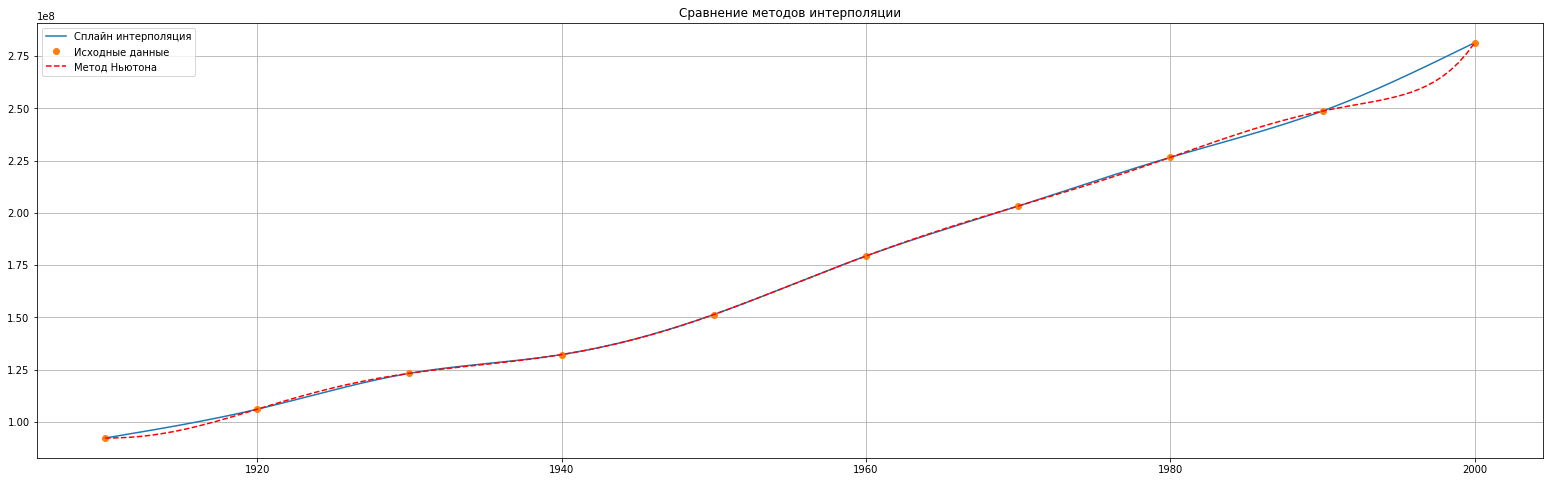

In [219]:
plt.figure(figsize=[27, 8])
Y = []
X = []
for i, pol in enumerate(polys):
  z = np.linspace(-years[i + 1] + years[i], 0, num=20)
  Y += list(pol(z))
  X += list(np.linspace(years[i], years[i + 1], num=20))

plt.title('Сравнение методов интерполяции')
plt.plot(X, Y, label='Сплайн интерполяция')
plt.plot(years, pop, 'o', label='Исходные данные')
newton_y = [Newt(x, years, n_coeffs) for x in X]
plt.plot(X, newton_y, '--r', label='Метод Ньютона')
plt.legend()
plt.grid()

In [220]:
calc2010 = polys[-1](2010 - 2000)
print(f'Исходное значение за 2010: {pop2010}')
print(f'Посчитанное методом сплайн за 2010: {calc2010}')
print(f'Посчитанное методом Ньютона за 2010: {prog}')

Исходное значение за 2010: 308745538
Посчитанное методом сплайн за 2010: 314133939.0
Посчитанное методом Ньютона за 2010: 827906509


Как мы видим, при сплайн-интеполяции получено более точное приближение, чем при методе Ньютона